# 파이썬 머신러닝

### 1장의 주요 내용
    1. 머신러닝의 일반적인 개념
    2. 머신러닝의 세 가지 유형
    3. 머신러닝 시스템 구축 모델
    4. 파이썬 설치와 설정 과정

## 2장. 분류를 위한 머신러닝 알고리즘 훈련
    1. 머신러닝 알고리즘 이해 : 2가지 모델 활용
    2. 파이썬 기반으로 머신러닝 알고리즘을 구축 방법 이해
    3. scikit-learn(사이킷런) 기반의 머신러닝 시스템 구축을 위한 사전 준비

### Table of Contents
1. [머신러닝의 초기 역사](#introduction)
2. [전통적인 머신러닝 알고리즘](#algorithms)
3. [Perceptron 알고리즘](#perceptron)
4. [Adaline 알고리즘](#Adaline)
5. [요약](#Summary)
6. [참고문헌](#Reference)

### 용어 설명
* weight : 가중치
* epoch : 훈련횟수

<div id='introduction'/>

## 1. 머신러닝의 역사

1943년, 워런 맥컬럭과 월터 피츠가 생물학적으로 뇌의 동작 원리를 정리한 논문 발표<br>
단순화된 뇌세포의 개념을 이론으로 정립. 명칭을 뉴런(neuron)이라고 사용 

### 뉴런(neuron)
    - 뉴런은 뇌의 신경전달 세포. 
    - 뉴런의 입/출력 신호는 화학적 신호와 전기적인 형태
    - 바이너리(ON/OFF) 출력을 갖는 간단한 논리 게이트로 표현
    
### 뉴런의 구성
    수상돌기(Dendrite), 세포핵(Cell nucleus), 축색돌기(Axon)로 구성
    1. 수상돌기(Dendrite) : 뉴런의 신호 입력 부분. 여러 수상돌기에 입력된 신호는 세포핵으로 전달 
    2. 세포핵(Cell nucleus) : 뉴런의 신호 처리 부분. 신호의 입력이 특정 임계치를 초과하면 신호 생성
    3. 축색돌기(Axon) : 뉴런의 신호 출력 부분 

In [8]:
from IPython.display import Image

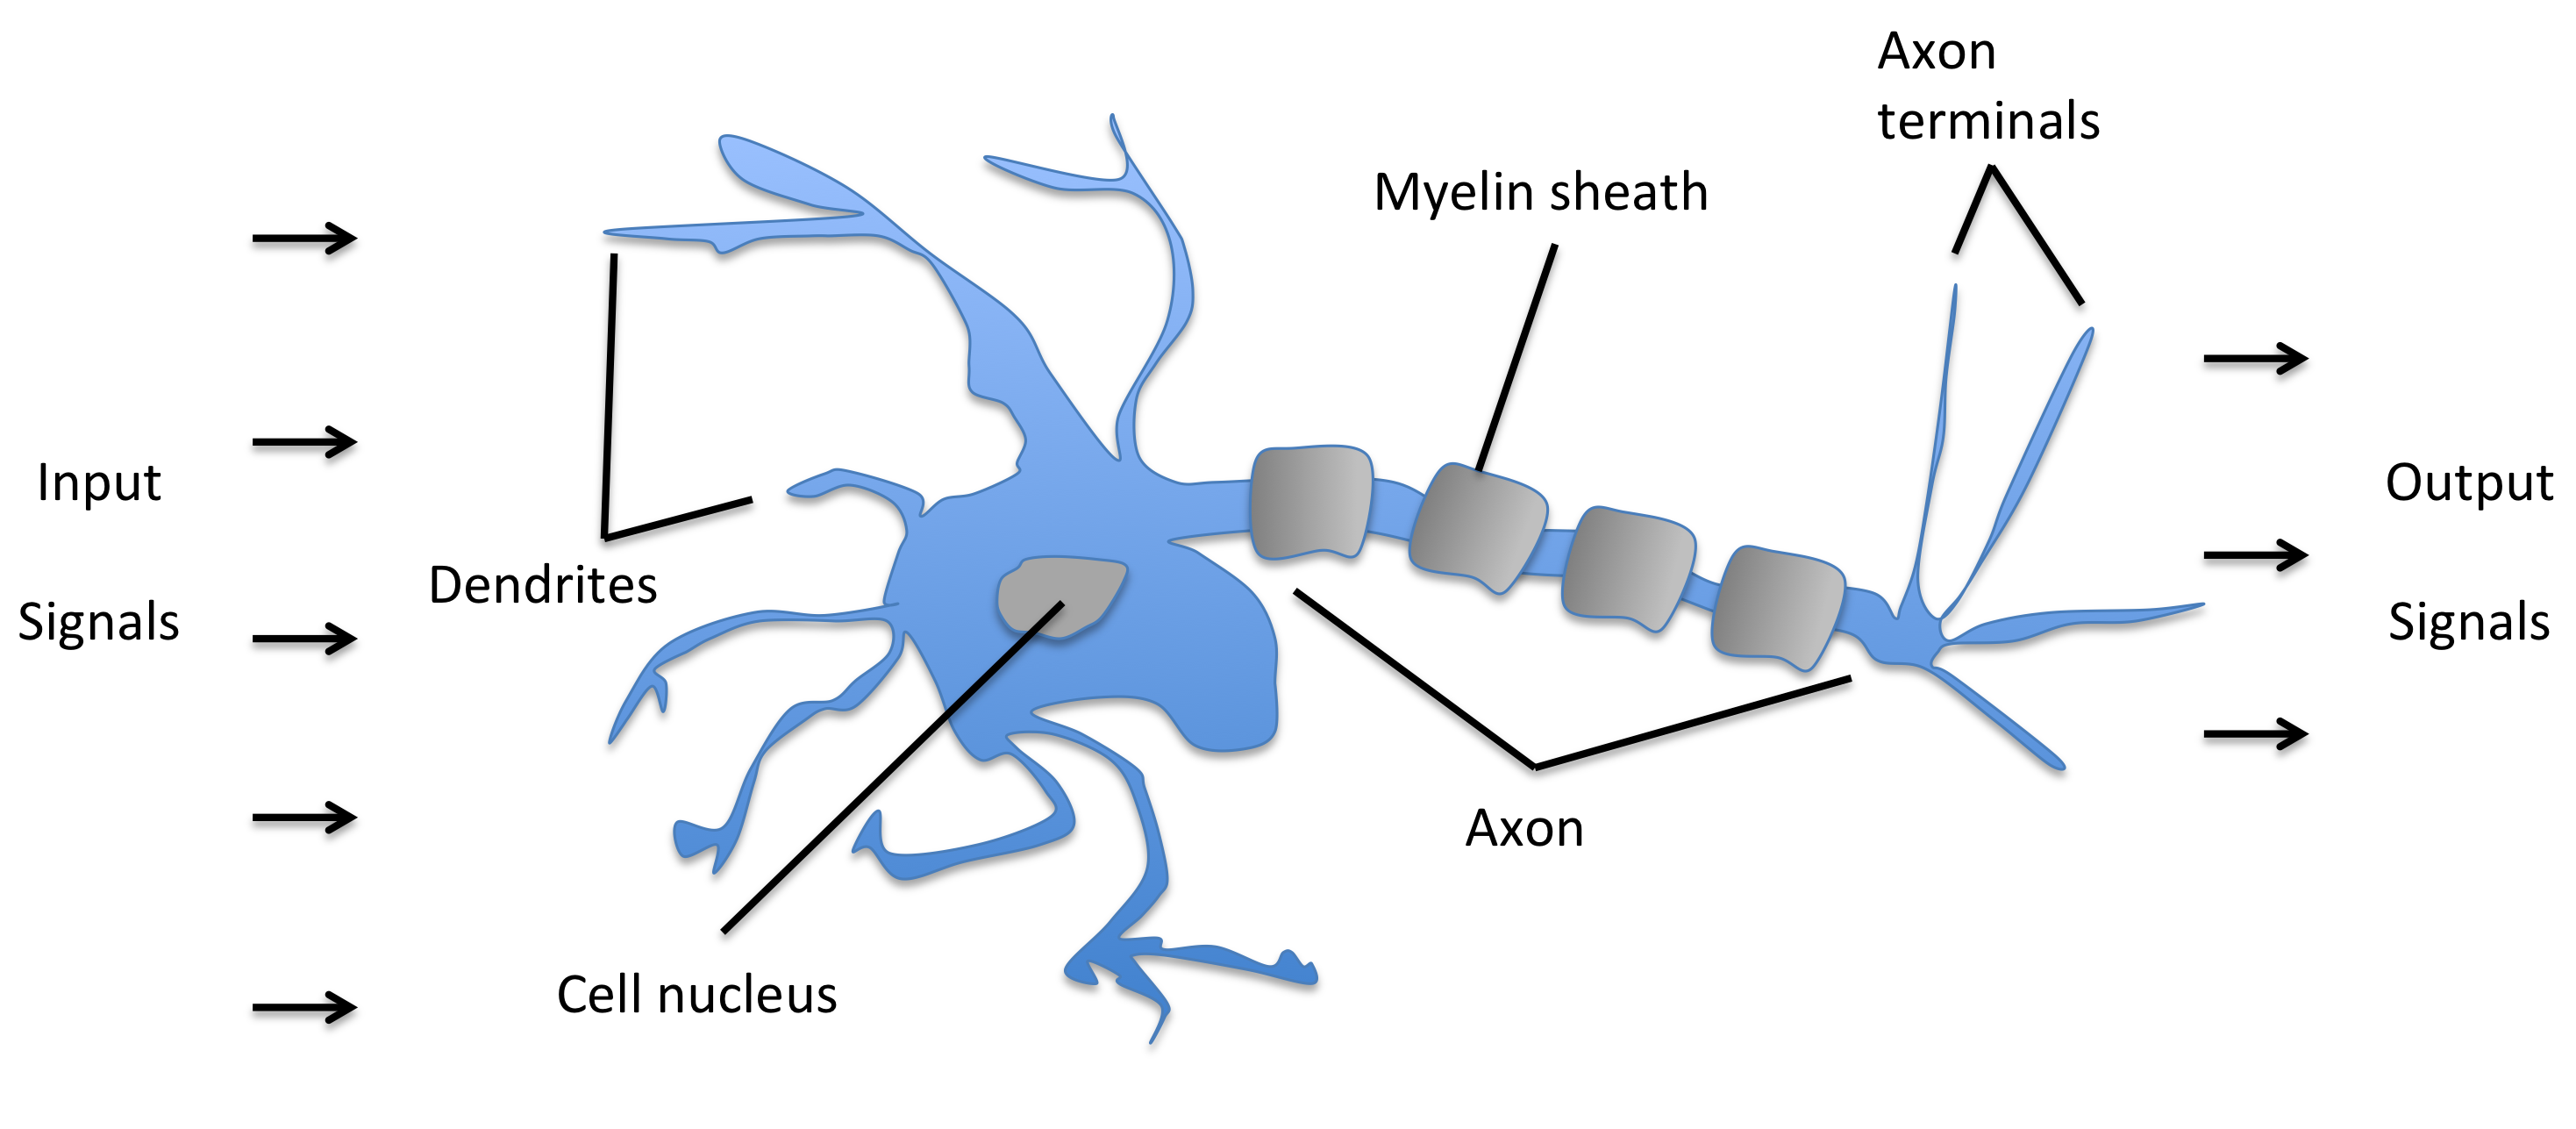

In [9]:
Image(filename='./images/02_01.png', width=500)

### 뇌의 신경 전달 체계
    - 뇌는 수 많은 뉴런들의 집합체 
    - 뉴런 간의 상호 작용으로 신경 전달 체계 구축 
    
### 최초의 인공뉴런 : Perceptron (퍼셉트론)
    - 1957년, 프랭크 로젠블랫이 뉴런 모델 기반한 퍼셉트론 알고리즘 발표
    - 가중계수를 자동으로 학습(Train)하고, 입력 피처와 곱하여 뉴런의 작동 여부를 결정하는 알고리즘 
    - 입력 데이터 X가 하나의 분류에 포함되는지, 다른 분류에 포함되는지 예측하는 데에 활용 가능

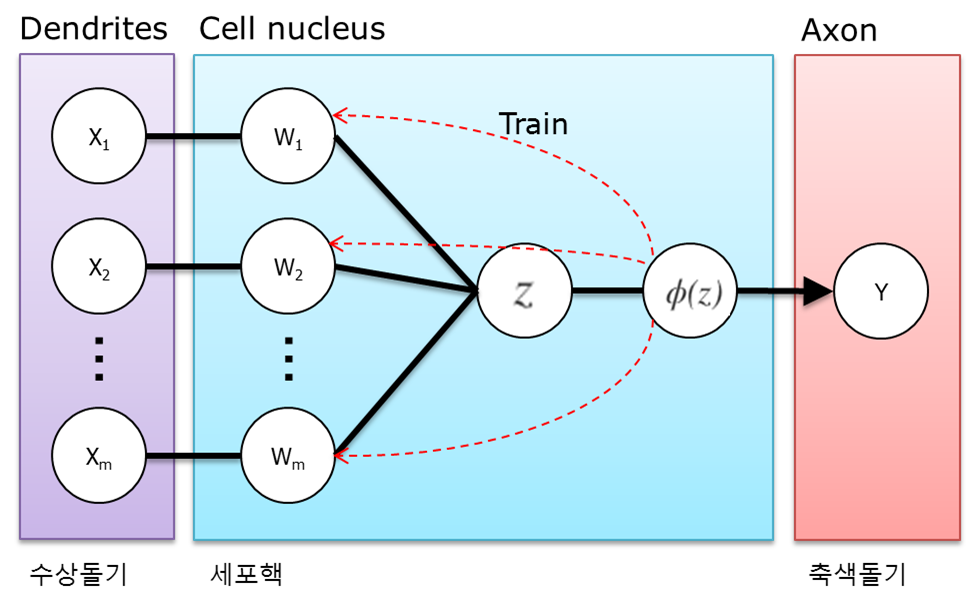

In [10]:
Image(filename='./images/02_02.png', width=400) 

### 지도학습 머신러닝 학습부분 알고리즘
    1. 가중계수 W <- 0 또는 임의의 작은 수로 초기화
    2. 각 샘플 데이터를 추출하여 아래 단계 반복
        1) 출력 결과 y' 계산 
        2) 가중계수 W 업데이트  ###목적함수를 통한 최적화

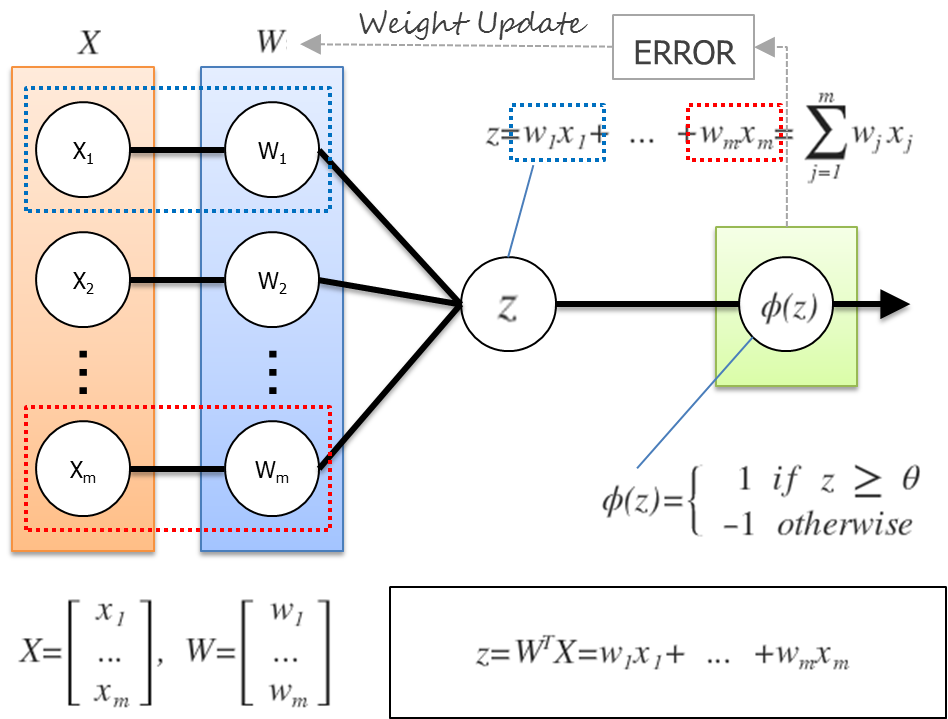

In [11]:
Image(filename='./images/02_03.png', width=400)

### 행렬의 기본이론
    - 이론#1. 행렬의 곱셈 연산
    - 이론#2. 행렬의 전치 연산

In [14]:
Image(filename='./images/02_04.png', width=400)

### 퍼셉트론의 단순화
    별도의 임계값 θ의 처리 필요
    => 행렬 X, W에 0번째 행 추가 : x0=1, W0=θ 

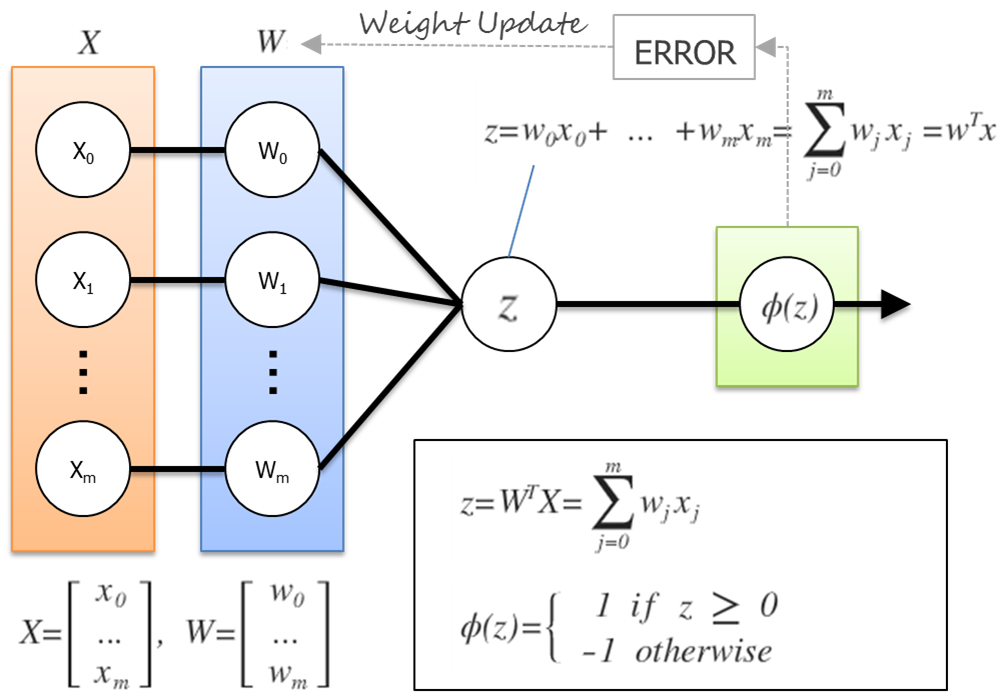

In [15]:
Image(filename='./images/02_05.png', width=400)

### Heaviside Step Function (계단함수)

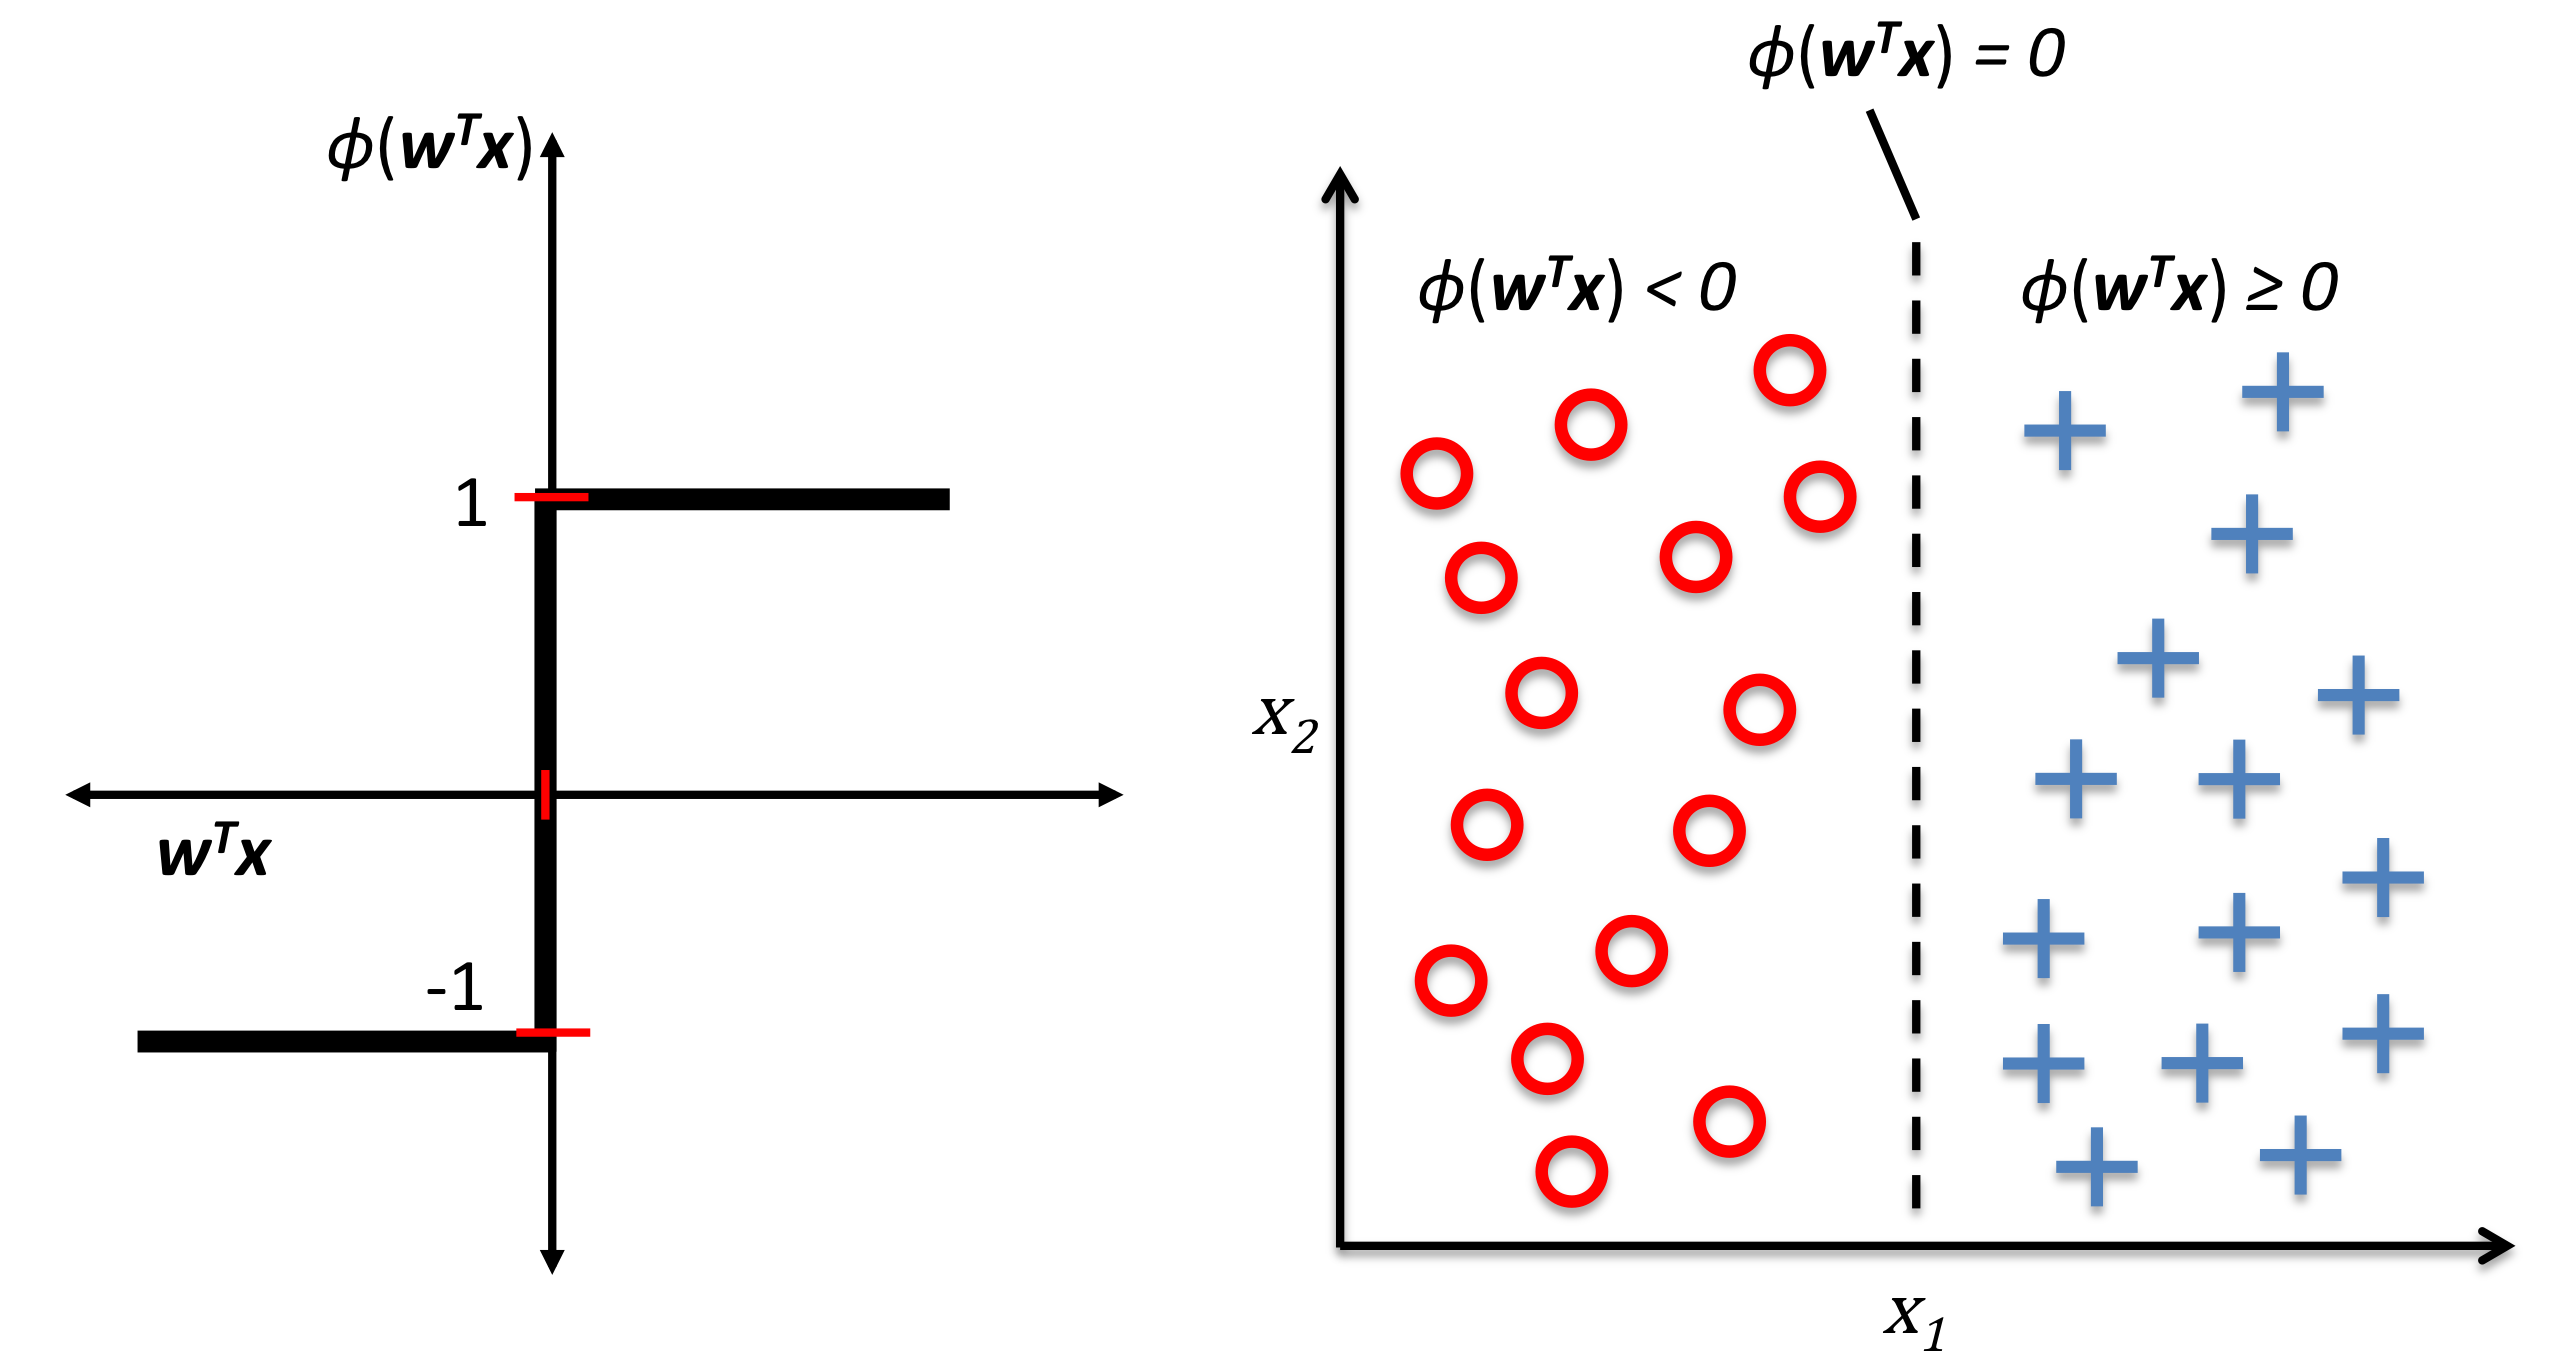

In [16]:
Image(filename='./images/02_06.png', width=500)

### Iris 관찰하기
    - Petal : 꽃받침, Sepal : 꽃잎 
    - 수집항목 : Sepal-length, Sepal-width, Petal-length, Petal-width
    - 수집대상 : 아리리스 꽃 3종 - Versicolor, Setosa, Virgina
    - 총 150개의 데이터 수집 (종별 50종)

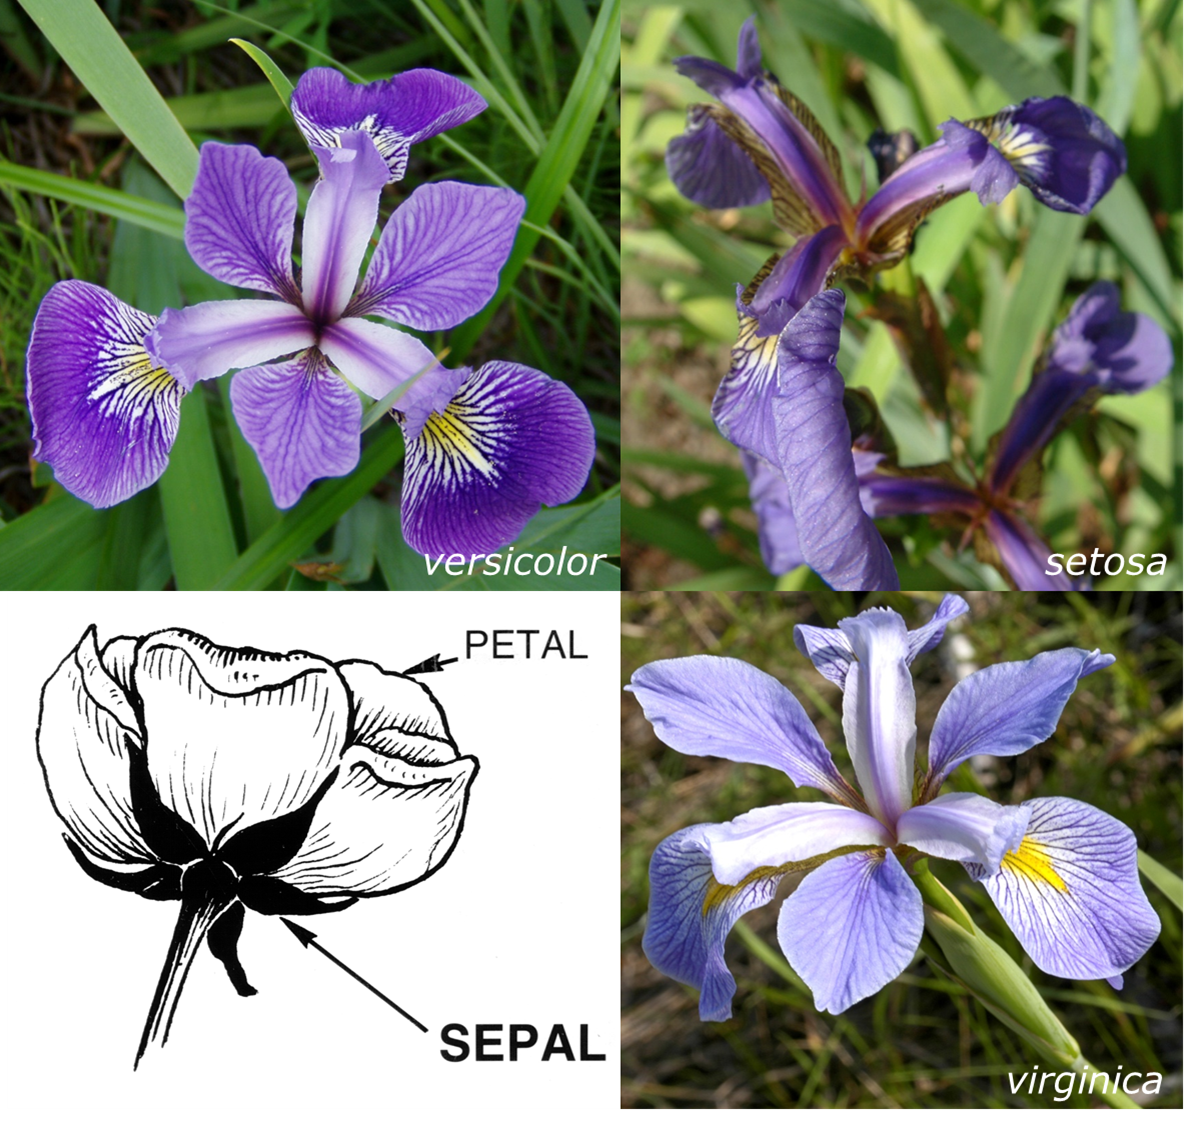

In [17]:
Image(filename='./images/02_07.png', width=350) 

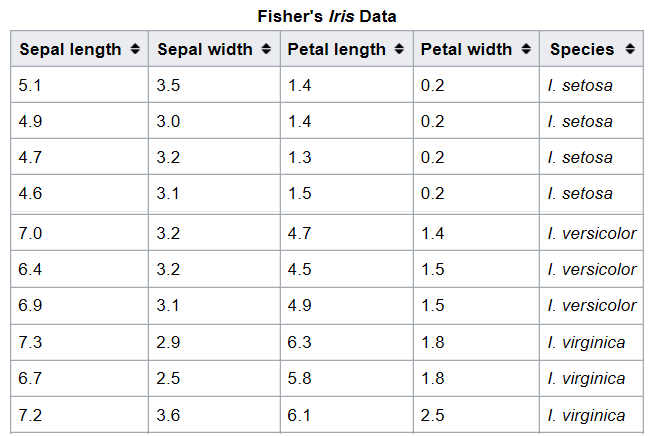

In [18]:
 Image(filename='./images/02_08.png', width=500) 

<div id='algorithms'/>

## 2. 전통적인 머신러닝 알고리즘

### 파이썬 실습환경

In [40]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
last updated: 2017-04-01 

numpy 1.11.3
pandas 0.19.2
matplotlib 2.0.0


<div id='algo1'/>

### 파이썬 알아두어야 할 사항
    1. 클래스 : https://wikidocs.net/28
    2. numpy, panda, matplot 라이브러리 활용
    3. 

### 1) Perceptron 알고리즘

In [27]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier (퍼셉트론 분류기).

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### 초기 가중계수를 임의의 수를 부여하는 방법

```python

    def __init__(self, eta=0.01, n_iter=50, random_seed=1): # add random_seed=1
        ...
        self.random_seed = random_seed # add this line

    def fit(self, X, y):
        ...
        # self.w_ = np.zeros(1 + X.shape[1]) ## remove this line
        rgen = np.random.RandomState(self.random_seed) # add this line
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # add this line
```

### 샘플 데이터 랜덤 추출

```python
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):  # new
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle  # new
        if random_state:  # new
            np.random.seed(random_state)  # new

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            if self.shuffle:  # new
                X, y = self._shuffle(X, y)  # new
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def _shuffle(self, X, y):  # new
        """Shuffle training data"""  # new
        r = np.random.permutation(len(y))  # new
        return X[r], y[r]  # new

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
```

## 아이리스 데이터에 퍼셉트론 모델의 훈련하기
    1. 판다 라이브러리를 데이터 로드하기 사용하여 외부 데이터로드
    2. 판다 라이브러리의 DataFrame 오브젝트를 이용
    3. 캘리포니아 대학교(UCI) 머신러닝 리파지토리 :  

In [25]:
import pandas as pd
# UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/iris/iris.data', header=None)
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

<hr>

### 데이터 전처리
    1. 총 3개의 꽃 분류 중 2개의 꽃 분류 Setosa, Versicolor 샘플 추출
    2. 총 4개의 피처 중 2개의 피처 Sepal length, Petal length 추출

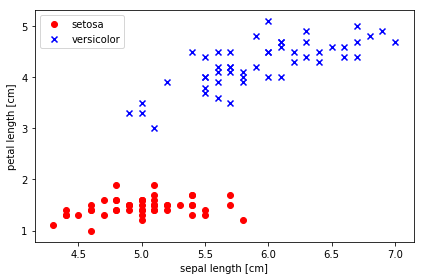

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length & petal length 추출
# [x1, x2], z = w0 + x1*w1 + x2*w2
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

### 퍼셉트론 모델로 학습하기

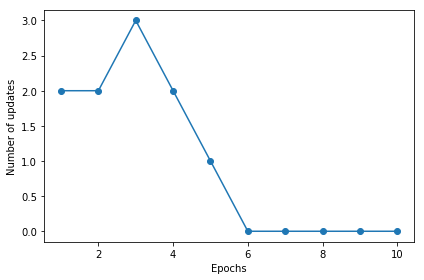

In [30]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

### A function for plotting decision regions

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

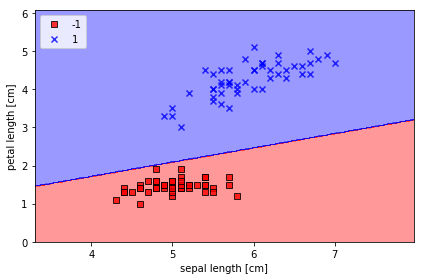

In [36]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

<div id='introduction'/>


## Adaline 알고리즘

    1. 1960년,
    2. 비용함수를 정의하고, 비용함수 최소화하는 것을 알고리즘의 주요 개념
    3. 비용함수는 로지스틱 회귀 모델이나 서프트 벡터 머신 등 현대 머신러닝에서 활용하는 개념
    4. 선형 활성함수는 순입력 함수의 항등함수이다

### 퍼셉트론과 에이다라인의 차이점
    1. 가중치 업데이트 방법
        퍼셉트론 : 단위 계단 함수 이용. 퍼셉트론은 분류 레이블을 이용하여 사용
        에이다라인 : 선형 활성함수 이용. 선형 활성함수로부터 연속형 출력값을 사용
    2. 
    3. 
    
### 비용함수
    1. 지도학습 알고리즘의 중요 요소 중의 하나는 최적화될 목적함수를 정의하는 것
    2. 목적함수 vs 비용함수?
### 에이다라인의 비용함수    
    3. 비용함수 J : 계산된 출력과 진짜 분류 레이블 간의 편차제곱합인 가중치를 학습
    4. 연속 선형 활성함수의 장점은
        1) 비용함수가 미분가능
        2) 볼록성
### 배치 그래디언트 디센트
    1. 간편하고 강력한 최적화 알고리즘
    2. 국지적 비용 최소화, 전역 비용 최소화에 다다를 때까지의 언덕을 내려가는 방식으로 설명
    3. 각각의 이터레이션동안 단계의 크기의 변수 : 그레디언트 경사, 학습률
    4. 비용함수 J(W)의 그래디언트 delta J(W)가 반영된 가중치로 업데이트 
    5. 비용함수 J(W)를 계산하기 위해서는 각각의 가중치에 대한 비용함수의 편도함수를 계산해야 한다.
    6. 모든 가중치는 동시에 업데이트 되기 때문에 

### Cost Function 최소화하기 (Gradient Descent)

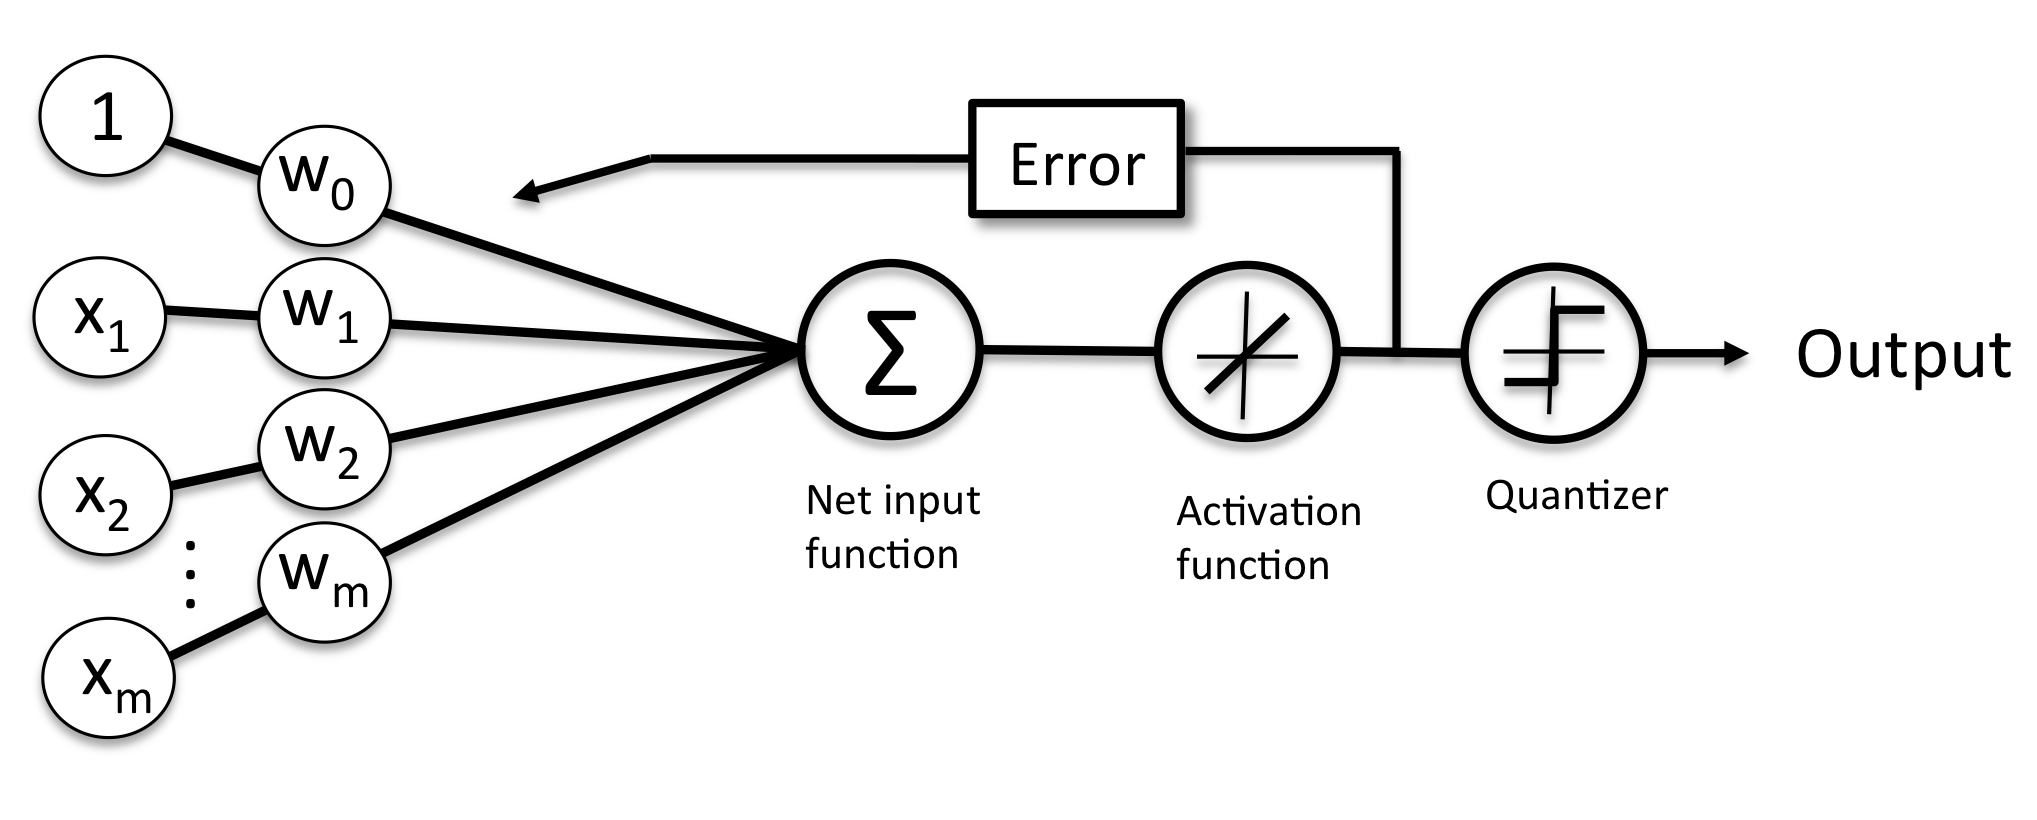

In [14]:
 Image(filename='./images/02_09.png', width=600) 

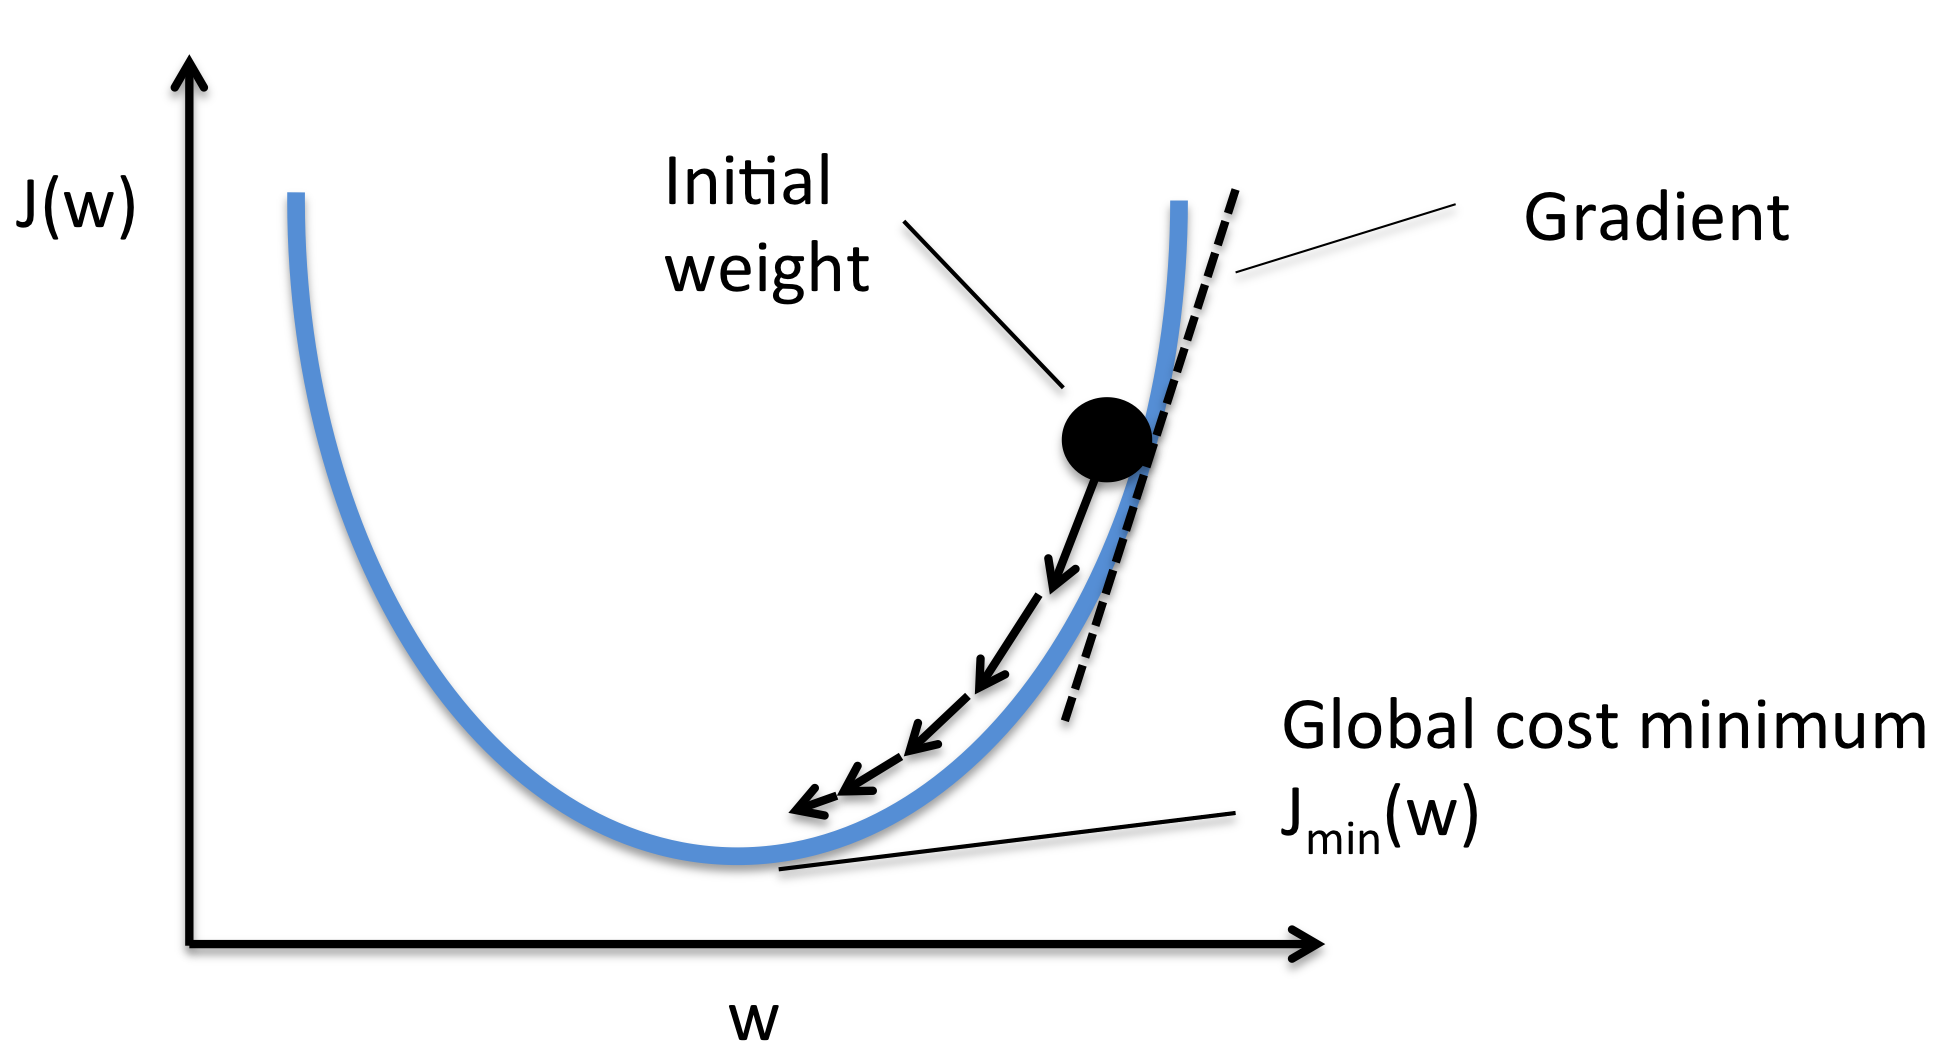

In [15]:
 Image(filename='./images/02_10.png', width=500) 

<br>
<br>

### Adaline 알고리즘 구현하기

In [16]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

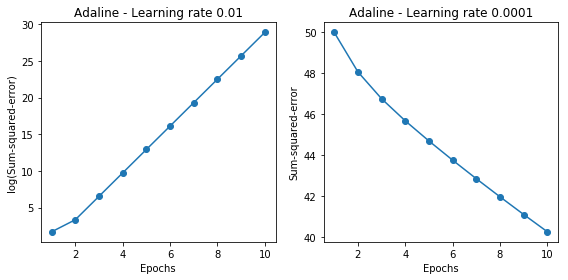

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

<br>
<br>

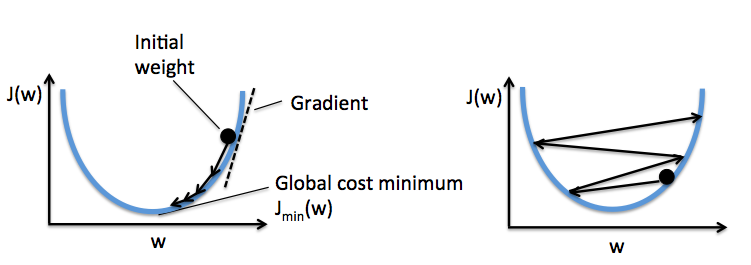

In [18]:
Image(filename='./images/02_12.png', width=700) 

<br>
<br>

In [19]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

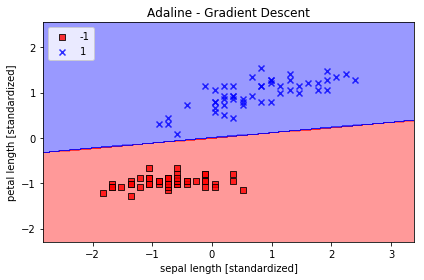

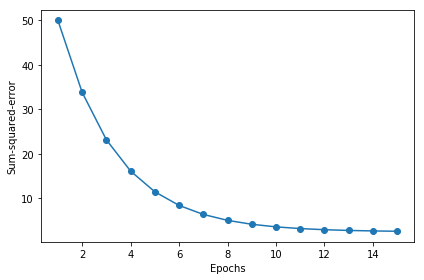

In [20]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

<br>
<br>

## Large scale machine learning and stochastic gradient descent

In [21]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

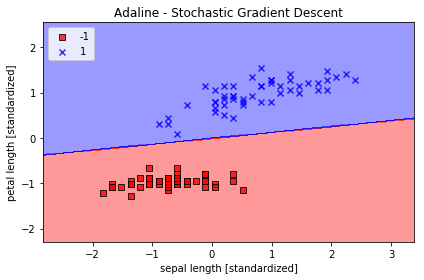

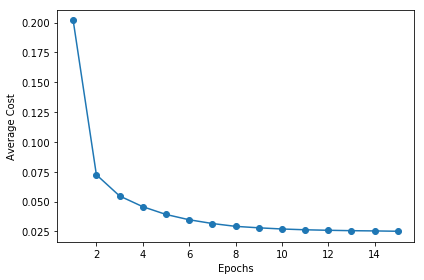

In [22]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./adaline_4.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()

In [23]:
ada.partial_fit(X_std[0, :], y[0])

### 확률적 그래디언트 디센트
    1. 장점
        온라인 학습에 사용 할 수 있다느 것
        데이터가 도착했을 때, 모델이 즉시 훈련된다.
        대용량 데이터를 통하여 훈련하는 경우 유용
        온라인 학습에 사용하면 즉시 변화에 적응할 수 있고,
        스토리지 공간에 문제가 있다면 모델을 업데이트 한 후 훈련 데이터는 폐기될 수 있다. 
### 미니 배치 학습
    배치 그래디언트 디센트와 확률적 디센트 절충 알고리즘
    작은 훈련 데이터의 부분집합에 적용(한번에 50개 샘플)
    배치 그래디언트 디센트의 장점은 더욱 자주 가중치 업데이트가 발생하기 떄문에 미니 배치를 통해 더 빨리 수렴에 이른다는 것
    미니 배치 학습은 확률적 그래디언트 디센트에서 훈련 샘플들에 대한 for-loop를 벡터화 연산으로 대체할 수 있게 함으로써 학습 알고리즘의 계산상 효율을 더욱 개선 가능
    
    

<br>
<br>

# Summary

...

# Appendix

The code below (not in the book) is a simplified, example implementation of a logistic regression classifier trained via gradient descent. The AdalineGD classifier was used as template and I commented the respective lines that were changed to turn it into a logistic regression classifier (as briefly mentioned in the "logistic regression" sections of Chapter 3).

In [24]:
class LogisticRegressionGD(object):
    """Logistic regression classifier via gradient descent.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        # We use the more common convention for logistic
        # regression returning class labels 0 and 1
        # instead of -1 and 1. Also, the threshold then
        # changes from 0.0 to 0.5 
        return np.where(self.activation(X) >= 0.5, 1, 0)
    
    # The Content of `activation` changed 
    # from linear (Adaline) to sigmoid.
    # Note that this method is now returning the
    # probability of the positive class
    # also "predict_proba" in scikit-learn
    def activation(self, X):
        """ Compute sigmoid activation."""
        z = self.net_input(X)
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        return sigmoid

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

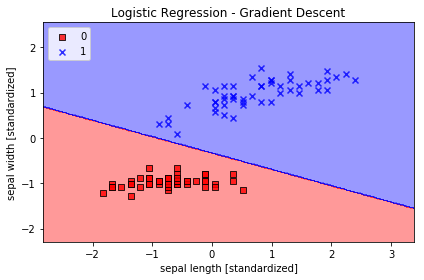

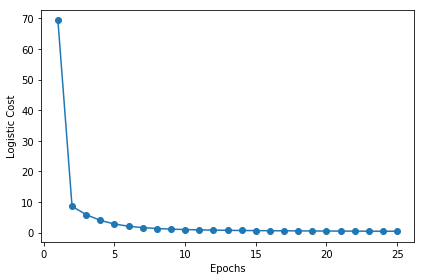

In [26]:
lr = LogisticRegressionGD(n_iter=25, eta=0.15)
lr.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()